In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Oct 13 13:55:24 2019

@author: rupesh
"""

'\nCreated on Sun Oct 13 13:55:24 2019\n\n@author: rupesh\n'

#### Imports
We'll use a familiar stack of Data Science libraries such as <b>Pandas</b>, <b>Numpy</b>, <b>Matplotlib</b>, <b>Seaborn</b>, and eventually <b>Sklean</b> for modeling.

In [28]:
# Data Manipulation
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model
from sklearn.linear_model import LinearRegression, Ridge

from sklearn.model_selection import cross_val_score

In [15]:
# Read in data

gmData = pd.read_csv("https://raw.githubusercontent.com/sawrupesh04/DataCamp/master/Machine%20Learning/dataset/gapminder_data.csv")
gmData.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


<b>.head()</b> gives us all columns with there values. To get a quick overview of data we use <b>.info()</b>

In [16]:
gmData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 10.9+ KB


This tells us there are 9 float columns and 139 training examples. To get statistics overview we use <b>.describe()</b>

In [17]:
gmData.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


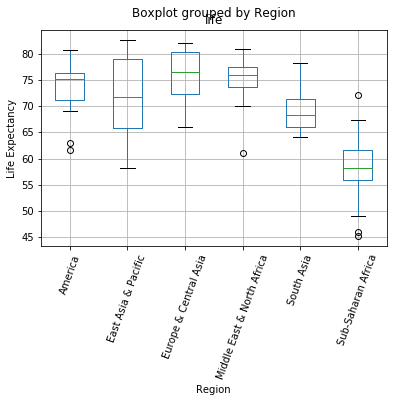

In [24]:
# Create a box plot of life expectancy over region

gmData.boxplot('life', 'Region', rot=70)
plt.xlabel('Region')
plt.ylabel('Life Expectancy')
plt.show()

We have lots of information about the data. So we know Columns, Columns data type, and these statistics term.
Let's get some correlation between columns.

#### We are using "Scikit-learn" and it is not accepting the non-numerical features. In our dataset, Region is very important feature and it is categorical feature(non-numerical), it gives the information that can predict the life expectancy. To this we need to binarize by creating dummy variables.

In [32]:
gmData_region = pd.get_dummies(gmData, drop_first=True)
gmData_region.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,1,0,0,0,0


In [37]:
# Input Features
X = gmData_region.drop('life', axis=1)

# Target 
y = gmData_region['life']

In [39]:
# Intantiate a ridge regression
ridge = Ridge(alpha=0.5, normalize=True)

# Perform 5-cross validation
ridge_cv = cross_val_score(ridge, X, y, cv=5)

# print cross validated score
ridge_cv


array([0.86808336, 0.80623545, 0.84004203, 0.7754344 , 0.87503712])

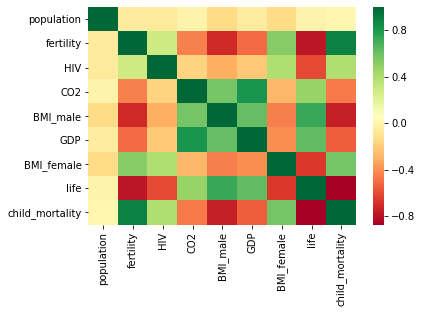

In [7]:
sns.heatmap(gmData.corr(), cmap='RdYlGn')

Get more about the correlation plot using <a href='http://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn</a>.Here, I'm using <b>Red</b>, <b>Yellow</b> and <b>Green</b> colour.
<ul>
    <li><b>Red</b>: represent the -ve correlation.</li>
    <li><b>Green</b>: represent the +ve correlation.</li>
</ul>

We can clearly see from the above heatmap plot <b>fertility and life</b> is a high -ve correlation.
Let's explore fertility and life columns.

In [8]:
fertility = gmData.fertility.values
life = gmData.life.values

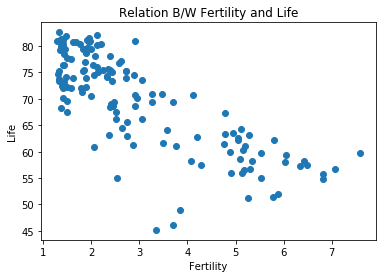

In [9]:
plt.scatter(fertility, life)
plt.xlabel('Fertility')
plt.ylabel('Life')
plt.title('Relation B/W Fertility and Life')
plt.show()

We can clearly see from the above figure Life decrease with Fertility. Let's create model for life and fertility.
I'm using sklearn LinearRegression.Get more information about <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">this</a>

In [10]:
fertility.shape

(139,)

In [11]:
life.shape

(139,)

In [12]:
# We know the shapes of fertility and life. sklearn is not working with 1D data. Let's convert in 2D and then use

X_fertility = fertility.reshape(-1, 1)
y_life = life.reshape(-1, 1)

reg = LinearRegression()

reg.fit(X_fertility, y_life)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

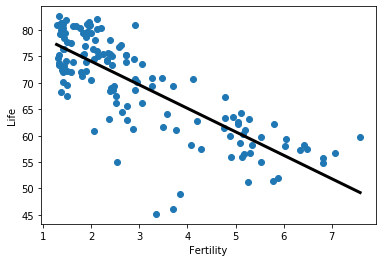

In [13]:

# prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1, 1)


y_pre = reg.predict(prediction_space)


# Plot regression line
    
plt.scatter(X_fertility, y_life)
plt.xlabel('Fertility')
plt.ylabel('Life')
plt.plot(prediction_space, y_pre, color='black', linewidth=3)
plt.show()
